In [1]:
import sys
import os

source_path = 'C:/Users/User/Desktop/Dyslexia project/Source'

if source_path not in sys.path:
    sys.path.append(source_path)
    

import data_manipulation as dm 
import data_visualization as dv
import data_processing as dp

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from model_test import Test

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
data = dm.read_data('reduced_data.xlsx')
data

,ID,BHK_raw_quality_score,median_Freq_speed,mean_d_P,dist_Freq_tilt_x,dist_Freq_speed,median_Freq_tilt_y,Space_Between_Words,bandwidth_tilt_x,std_d_P,mean_Pressure,in_Air,BHK_raw_speed_score,std_Density,median_Freq_tremolo,Age,Dysgraphia
0,S0995,25.500000,0.001744,0.130777,0.000498,0.000218,0.003318,1617.671646,0.004491,3.562989,592.221130,0.621097,207.000000,360.244714,0.003316,9,1
1,S0996,35.000000,0.001564,0.039345,0.000910,0.000126,0.003324,1714.428471,0.004954,1.495864,375.740844,0.587173,63.000000,303.268265,0.003233,9,1
2,S0997,31.333333,0.002356,-0.007538,0.000242,0.001056,0.003333,423.105339,0.003083,0.562388,127.736338,0.610327,74.000000,267.878028,0.003295,8,1
3,S1000,31.000000,0.001599,0.030485,0.000604,0.000136,0.003273,2371.746011,0.005016,1.560180,427.952813,0.604755,52.500000,205.989012,0.003344,8,1
4,S1001,22.666667,0.002250,0.025525,0.000704,0.000899,0.003388,926.590647,0.004022,1.788618,319.640759,0.770747,86.333333,230.280797,0.003338,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,S1376,34.500000,0.001715,0.004184,0.000721,0.000263,0.003367,1033.910155,0.004639,1.371368,332.983967,0.385017,105.500000,308.338614,0.003361,7,1
276,S1379,28.500000,0.002029,0.024090,0.000357,0.000527,0.003295,699.553191,0.003769,1.821784,301.977176,0.591674,201.000000,104.431172,0.003380,11,1
277,S1383,25.000000,0.002119,0.023631,0.000452,0.000781,0.003277,668.460279,0.004270,1.149694,221.949038,0.578211,158.500000,262.934937,0.003352,11,1
278,S1384,25.000000,0.002154,-0.005571,0.000195,0.000747,0.003336,75.451084,0.003236,0.808330,185.984346,0.400375,94.500000,320.034516,0.003328,10,1


In [7]:
X = data.drop(['Dysgraphia', 'ID'], axis = 1)
X = dm.sort_dataFrame(X)
y = data['Dysgraphia']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, shuffle = True, stratify = y)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
tst = Test(model = GaussianNB(), n_folds = 5)
scores = tst.cross_validation_scores(X_train, y_train)
scores

,Mean,STD
Accuracy,0.959103,0.020610
Recall,0.833333,0.104305
Precision,0.975000,0.050000
F1_Score,0.893552,0.067237


Accuracy: 0.9047619047619048, Recall: 0.6842105263157895, Precision: 0.8666666666666667, F1_Score: 0.7647058823529413
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        65
           1       0.87      0.68      0.76        19

    accuracy                           0.90        84
   macro avg       0.89      0.83      0.85        84
weighted avg       0.90      0.90      0.90        84



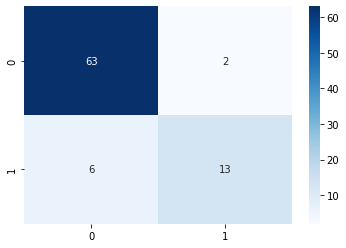

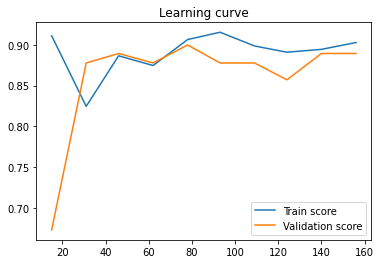

In [11]:
model = tst.train_test_report(X_train, y_train, X_test, y_test)

# Polynomial Features

In [12]:
poly_data = dp.PolynomialFeatures_labeled(X, 2).drop(['Constant Term'], axis = 1)
poly_data.head()

,BHK_raw_quality_score**1,BHK_raw_speed_score**1,median_Freq_speed**1,mean_d_P**1,median_Freq_tilt_y**1,mean_Pressure**1,median_Freq_tremolo**1,dist_Freq_tilt_x**1,dist_Freq_speed**1,Space_Between_Words**1,...,std_d_P**2,std_d_P**1 x std_Density**1,std_d_P**1 x in_Air**1,std_d_P**1 x Age**1,std_Density**2,std_Density**1 x in_Air**1,std_Density**1 x Age**1,in_Air**2,in_Air**1 x Age**1,Age**2
0,25.500000,207.000000,0.001744,0.130777,0.003318,592.221130,0.003316,0.000498,0.000218,1617.671646,...,12.694889,1283.547894,2.212962,32.066900,129776.253677,223.746952,3242.202422,0.385762,5.589874,81.0
1,35.000000,63.000000,0.001564,0.039345,0.003324,375.740844,0.003233,0.000910,0.000126,1714.428471,...,2.237610,453.648155,0.878331,13.462778,91971.640859,178.070908,2729.414389,0.344772,5.284556,81.0
2,31.333333,74.000000,0.002356,-0.007538,0.003333,127.736338,0.003295,0.000242,0.001056,423.105339,...,0.316281,150.651507,0.343241,4.499108,71758.637992,163.493266,2143.024226,0.372499,4.882618,64.0
3,31.000000,52.500000,0.001599,0.030485,0.003273,427.952813,0.003344,0.000604,0.000136,2371.746011,...,2.434162,321.379981,0.943527,12.481442,42431.472982,124.572954,1647.912094,0.365729,4.838043,64.0
4,22.666667,86.333333,0.002250,0.025525,0.003388,319.640759,0.003338,0.000704,0.000899,926.590647,...,3.199154,411.884328,1.378571,16.097560,53029.245559,177.488152,2072.527175,0.594050,6.936720,81.0


In [13]:
poly_data.head()

,BHK_raw_quality_score**1,BHK_raw_speed_score**1,median_Freq_speed**1,mean_d_P**1,median_Freq_tilt_y**1,mean_Pressure**1,median_Freq_tremolo**1,dist_Freq_tilt_x**1,dist_Freq_speed**1,Space_Between_Words**1,...,std_d_P**2,std_d_P**1 x std_Density**1,std_d_P**1 x in_Air**1,std_d_P**1 x Age**1,std_Density**2,std_Density**1 x in_Air**1,std_Density**1 x Age**1,in_Air**2,in_Air**1 x Age**1,Age**2
0,25.500000,207.000000,0.001744,0.130777,0.003318,592.221130,0.003316,0.000498,0.000218,1617.671646,...,12.694889,1283.547894,2.212962,32.066900,129776.253677,223.746952,3242.202422,0.385762,5.589874,81.0
1,35.000000,63.000000,0.001564,0.039345,0.003324,375.740844,0.003233,0.000910,0.000126,1714.428471,...,2.237610,453.648155,0.878331,13.462778,91971.640859,178.070908,2729.414389,0.344772,5.284556,81.0
2,31.333333,74.000000,0.002356,-0.007538,0.003333,127.736338,0.003295,0.000242,0.001056,423.105339,...,0.316281,150.651507,0.343241,4.499108,71758.637992,163.493266,2143.024226,0.372499,4.882618,64.0
3,31.000000,52.500000,0.001599,0.030485,0.003273,427.952813,0.003344,0.000604,0.000136,2371.746011,...,2.434162,321.379981,0.943527,12.481442,42431.472982,124.572954,1647.912094,0.365729,4.838043,64.0
4,22.666667,86.333333,0.002250,0.025525,0.003388,319.640759,0.003338,0.000704,0.000899,926.590647,...,3.199154,411.884328,1.378571,16.097560,53029.245559,177.488152,2072.527175,0.594050,6.936720,81.0


In [14]:
poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(poly_data, y, test_size = 0.3, random_state = 0, shuffle=True, 
                                                        stratify = y)
poly_scaler = StandardScaler()
poly_X_train = poly_scaler.fit_transform(poly_X_train)
poly_X_test = poly_scaler.transform(poly_X_test)

In [15]:
poly_X_train = pd.DataFrame(poly_X_train, columns = poly_data.columns)
poly_X_test = pd.DataFrame(poly_X_test, columns = poly_data.columns)

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector

In [17]:
selector = SequentialFeatureSelector(GaussianNB(),
                                    cv = 5, scoring = 'recall', n_features_to_select = 'auto',
                                    direction = 'forward', tol = 0.00000001)

In [18]:
selector.fit(poly_X_train, poly_y_train)

SequentialFeatureSelector(estimator=GaussianNB(), n_features_to_select='auto',
                          scoring='recall', tol=1e-08)

In [19]:
new_features = list(selector.get_feature_names_out())
new_features

['Space_Between_Words**1',
 'BHK_raw_quality_score**1 x BHK_raw_speed_score**1',
 'BHK_raw_quality_score**1 x median_Freq_speed**1',
 'BHK_raw_quality_score**1 x Age**1']

In [20]:
sfs_test = Test(model = GaussianNB(), n_folds = 5)
scores = sfs_test.cross_validation_scores(poly_X_train[new_features], poly_y_train)
scores

,Mean,STD
Accuracy,0.959231,0.020391
Recall,0.950000,0.061237
Precision,0.893636,0.098987
F1_Score,0.914236,0.032525


Accuracy: 0.9166666666666666, Recall: 0.8947368421052632, Precision: 0.7727272727272727, F1_Score: 0.8292682926829269
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        65
           1       0.77      0.89      0.83        19

    accuracy                           0.92        84
   macro avg       0.87      0.91      0.89        84
weighted avg       0.92      0.92      0.92        84



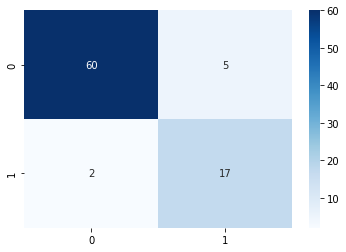

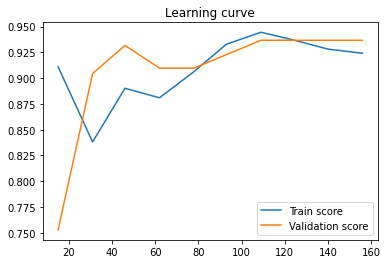

GaussianNB()

In [21]:
sfs_test.train_test_report(poly_X_train[new_features], poly_y_train, poly_X_test[new_features], poly_y_test)

# Paramters Optimization

In [22]:
from genetic_algorithm import GeneticAlgorithm

In [25]:
priors = np.arange(start = 0.7, stop = 0.9, step = 0.005)
priors_ = [[prior, 1 - prior] for prior in priors]

In [47]:
param_nb = {
     'priors': priors_
}

In [48]:
optimizer = GeneticAlgorithm(GaussianNB(), param_nb, 
                            poly_X_train[new_features], poly_y_train, 6, 1, 30)

In [49]:
parameters = optimizer.evolution()
parameters[0]

{'priors': [0.9000000000000001, 0.09999999999999987]}

Paramters: {'priors': [0.9000000000000001, 0.09999999999999987]}


In [189]:
prior = 0.9
tuned_model = Test(model = GaussianNB(priors = [prior, 1 - prior]), n_folds = 5)
scores = sfs_test.cross_validation_scores(poly_X_train[new_features], poly_y_train)
scores

,Mean,STD
Accuracy,0.959231,0.020391
Recall,0.950000,0.061237
Precision,0.893636,0.098987
F1_Score,0.914236,0.032525


Accuracy: 0.9404761904761905, Recall: 0.8947368421052632, Precision: 0.85, F1_Score: 0.8717948717948718
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        65
           1       0.85      0.89      0.87        19

    accuracy                           0.94        84
   macro avg       0.91      0.92      0.92        84
weighted avg       0.94      0.94      0.94        84



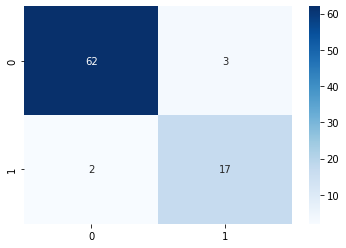

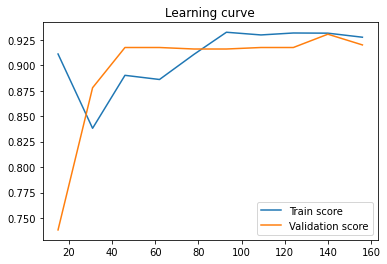

In [190]:
tuned_model_ = tuned_model.train_test_report(poly_X_train[new_features], poly_y_train, poly_X_test[new_features], poly_y_test)

# Test on Synthetic Data

In [180]:
syn_data = dm.read_data('Synthetic_data.xlsx')
syn_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
syn_data = dm.sort_dataFrame(syn_data)

In [181]:
poly_syn_data = dp.PolynomialFeatures_labeled(syn_data.drop('Dysgraphia', axis = 1), power = 2)
poly_syn_data.drop('Constant Term', axis = 1, inplace = True)

In [182]:
features, target = poly_syn_data, syn_data['Dysgraphia'] 
features = pd.DataFrame(poly_scaler.transform(features), columns = poly_data.columns)
features.head()

,BHK_raw_quality_score**1,BHK_raw_speed_score**1,median_Freq_speed**1,mean_d_P**1,median_Freq_tilt_y**1,mean_Pressure**1,median_Freq_tremolo**1,dist_Freq_tilt_x**1,dist_Freq_speed**1,Space_Between_Words**1,...,std_d_P**2,std_d_P**1 x std_Density**1,std_d_P**1 x in_Air**1,std_d_P**1 x Age**1,std_Density**2,std_Density**1 x in_Air**1,std_Density**1 x Age**1,in_Air**2,in_Air**1 x Age**1,Age**2
0,0.572982,-1.349296,-0.915145,-0.819750,1.004701,0.826893,0.679553,-0.247230,0.237752,0.194778,...,-1.082912,-0.438814,-1.094723,-1.445784,0.388016,0.405810,-0.235971,-0.043216,-1.447666,-1.643416
1,0.441014,-0.883993,-1.152248,0.033426,-0.151270,-0.125666,0.673484,-0.164502,0.713368,0.479448,...,-0.717693,-0.524489,-0.588403,-1.147873,-0.359185,-0.204761,-0.791721,-0.072663,-1.465067,-1.643416
2,-0.130845,-0.259983,-0.397416,-0.478046,0.199664,-1.246003,0.894840,0.409465,-0.424547,-0.597363,...,-0.911577,0.000129,-0.489473,-0.932603,0.743716,1.068651,0.705197,1.052937,0.426727,-0.596756
3,1.584733,-1.158125,-0.927376,-0.075512,1.795669,0.085838,0.591539,0.266314,0.297270,0.896924,...,-0.673999,0.361721,0.140423,-0.905471,0.807291,1.400595,0.384578,1.868438,0.237276,-1.157467
4,-0.064862,-0.168005,-0.772471,0.142842,0.875173,-0.721070,0.680223,-0.189620,-0.106759,-0.078281,...,-0.061150,0.357792,0.286942,0.352017,0.014165,0.232850,0.646773,0.275163,1.026260,0.748949


In [183]:
tuned_model.test_on_synthetic_data(features[new_features], target)

Accuracy: 0.9490445859872612, Recall: 0.8518518518518519, Precision: 0.8518518518518519, F1_Score: 0.8518518518518519


# PipeLine Automation

In [76]:
from sklearn.pipeline import Pipeline

In [184]:
model = Pipeline([('std_sca' ,StandardScaler()), ('gnb', GaussianNB(priors = [prior, 1 - prior]))])

In [185]:
X_final = dp.PolynomialFeatures_labeled(X, 2)
X_final = X_final[new_features]

In [186]:
model.fit(X_final, y)
preds, probs = model.predict(X_final), model.predict_proba(X_final)[:, 1]

In [187]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
print('Accuracy: {}, Recall: {}, Precision: {}, F1: {}'.format(accuracy_score(y, preds), recall_score(y, preds), precision_score(y, preds), f1_score(y, preds)))

Accuracy: 0.9571428571428572, Recall: 0.8870967741935484, Precision: 0.9166666666666666, F1: 0.9016393442622951


In [188]:
model.named_steps['gnb'].class_prior_

array([0.9, 0.1])

# Model Deployment

In [102]:
import pickle 

In [103]:
with open('C:/Users/User/Desktop/Dyslexia project/Models/gaussian_model.pkl', 'wb') as file:
    pickle.dump(model, file)